In [31]:
import joblib
modelf = joblib.load("random_forest_model.pkl")
modell = joblib.load("linear_regression_model.pkl")

In [32]:
import pandas as pd
import numpy as np

# Número de filas (ejemplo: 100 registros)
n = 100
np.random.seed(42)  # reproducibilidad

data = {
    "priceeach": np.random.uniform(50, 200, size=n).round(2),       # Precio unitario
    "msrp": np.random.uniform(80, 250, size=n).round(2),            # Precio de lista
    "quantityordered": np.random.randint(1, 20, size=n),            # Cantidad ordenada
    "diferencia_ventas": np.random.randint(-500, 500, size=n),      # Diferencia entre ventas esperadas y reales
    "ratio_discount_priceeach": np.random.uniform(0.7, 1.0, size=n).round(2), # Ratio descuento
    "periodo_id": np.random.randint(1, 12, size=n)                  # Periodo (ej. mes)
}

df = pd.DataFrame(data)

print(df.head())
print("Total de filas generadas:", len(df))


   priceeach    msrp  quantityordered  diferencia_ventas  \
0     106.18   85.34               11                492   
1     192.61  188.19               17               -237   
2     159.80  133.44                8               -448   
3     139.80  166.46                4                 71   
4      73.40  234.29                6                119   

   ratio_discount_priceeach  periodo_id  
0                      0.71           4  
1                      0.81           4  
2                      0.89           6  
3                      0.85           3  
4                      0.96           6  
Total de filas generadas: 100


In [33]:
#test del modelo Random Forest
predictions_rf = modelf.predict(df)
print("Predicciones Random Forest:", predictions_rf)


Predicciones Random Forest: [4.85201395 4.83094227 4.83094227 4.042111   4.85201395 4.83094227
 3.23805957 4.83094227 3.20236568 4.85201395 4.85201395 4.85201395
 2.36373629 3.23805957 4.85201395 4.85201395 4.042111   1.37149716
 4.042111   1.4139905  4.83094227 4.85201395 4.83094227 4.85201395
 3.20236568 4.85201395 1.4139905  4.85201395 4.85201395 4.85201395
 4.83094227 4.85201395 4.83094227 4.85201395 4.83094227 4.83094227
 2.29559354 1.37149716 4.83094227 1.4139905  4.112828   4.85201395
 4.83094227 4.042111   3.20236568 4.85201395 4.85201395 4.83094227
 4.85201395 4.83094227 3.20236568 4.85201395 4.11110956 4.83094227
 4.85201395 3.20236568 1.4139905  1.4139905  3.20191338 4.85201395
 4.83094227 3.20191338 4.85201395 4.85201395 4.83094227 4.85201395
 2.36373629 4.83094227 2.29559354 4.83094227 4.85201395 1.4139905
 4.85201395 4.83094227 4.85201395 4.83094227 4.83094227 3.23805957
 4.83094227 4.85201395 4.85201395 4.03783138 4.83094227 1.37149716
 4.83094227 4.83094227 4.83094227 4

c:\Users\pc\Desktop\info\Fraimel\Proyectos DS\PROYECTO #3 Predicción de Series de Tiempo (Forecasting)\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [34]:
#test del modelo regresion lineal
predictions_lr = modell.predict(df)
print("Predicciones Regresión Lineal:", predictions_lr)

#

Predicciones Regresión Lineal: [ 54.41884632 138.99309596 121.70882715  83.78956483  36.62466755
  67.50186262  49.03221027 131.62889385  77.71067691  96.53670532
  19.78178871 121.31748233 110.50231592  63.12227782  39.16590122
  33.91238878  38.23782613  67.26876208  60.97339349  62.92413202
  97.93707881  41.86154226  76.37693099  62.61966443  67.93124975
 109.10042028  57.46086594  71.38645463  84.82413949  39.35713275
 112.87410383  30.74865501  44.83806053 119.6796304  131.22999099
 126.6437213   43.25431991  22.18788212 118.90626739  69.17496015
  20.85920292  81.91381145  59.58591518 113.61266174  53.78345337
  96.57348405  55.40880948 100.61758653  87.26884276  64.21459754
 116.71149927 105.91697214 124.29122778 135.75725103  74.995023
 104.32287527  41.80193666  54.86577354  14.21573042  60.34373044
  73.63028257  49.51176993  99.83275992  55.91900023  79.04010202
  68.50631296  58.22023483 127.18760525  31.35441905 136.23898286
  85.84401777  65.26054606  24.28626136 123.800

c:\Users\pc\Desktop\info\Fraimel\Proyectos DS\PROYECTO #3 Predicción de Series de Tiempo (Forecasting)\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


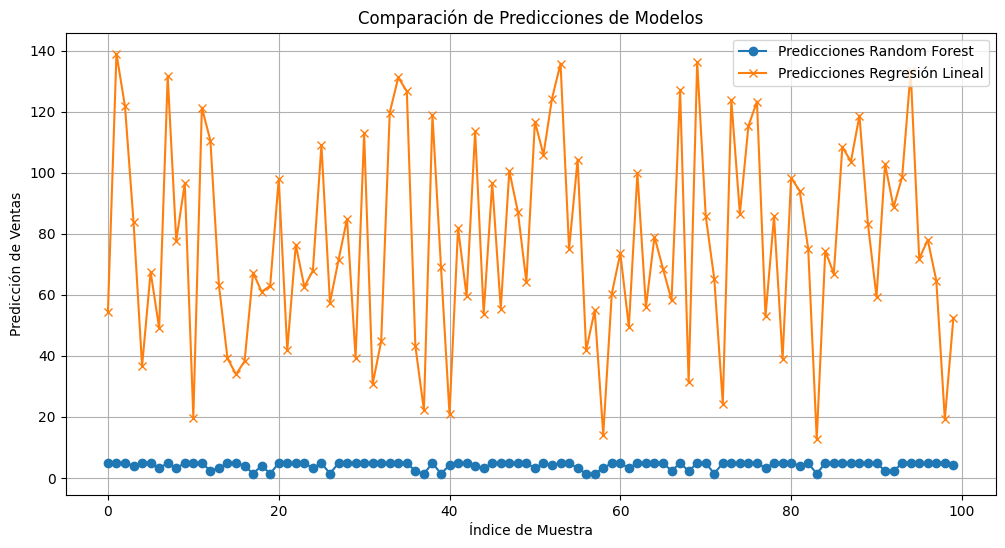

In [35]:
#graficas de las predicciones
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(predictions_rf, label='Predicciones Random Forest', marker='o')
plt.plot(predictions_lr, label='Predicciones Regresión Lineal', marker='x')
plt.title('Comparación de Predicciones de Modelos')
plt.xlabel('Índice de Muestra')
plt.ylabel('Predicción de Ventas')
plt.legend()
plt.grid()
plt.show()


La gráfica “Comparación de Predicciones de Modelos” evidencia diferencias significativas en el comportamiento de los algoritmos de Random Forest y Regresión Lineal al predecir ventas. El modelo de Random Forest muestra una tendencia estable y conservadora, con predicciones agrupadas en un rango estrecho, lo que sugiere una alta regularización o una limitada sensibilidad a variaciones en los datos. En contraste, la Regresión Lineal presenta una alta dispersión en sus predicciones, captando con mayor intensidad las fluctuaciones entre muestras, aunque con riesgo de sobreajuste ante valores extremos o ruido.

Esta divergencia refleja cómo cada modelo interpreta las relaciones entre variables: Random Forest prioriza robustez y generalización, mientras que la Regresión Lineal responde de forma más directa a patrones lineales. Si bien ambos modelos alcanzan métricas de desempeño elevadas, la elección óptima dependerá del objetivo del análisis: precisión y estabilidad vs. interpretabilidad y sensibilidad.

Un ejemplo ilustrativo de esta diferencia se observa en la predicción de ventas para la observación número 80 en el conjunto de prueba. El modelo de Regresión Lineal predice una venta cercana a 100 unidades, mientras que el modelo de Random Forest estima una cifra considerablemente menor, alrededor de 20 unidades.
Esta discrepancia puede atribuirse a la naturaleza de los modelos: la Regresión Lineal, al basarse en una relación lineal directa entre las características y la variable objetivo, puede verse influenciada por valores atípicos o combinaciones específicas de características que sugieren una venta alta. En cambio, el Random Forest, al promediar múltiples árboles de decisión, tiende a suavizar estas influencias, resultando en una predicción más moderada.


# Conclusión
En resumen, la selección del modelo debe alinearse con las necesidades específicas del proyecto, considerando tanto las características de los datos como los requisitos de negocio.    